android 实现远程模拟点击
1   .apk是AndroidPackage的缩写，是安卓app文件的拓展名，app的安装包
2. IDE集成开发环境
   实际开发中，除了编译器是必须的工具，我们往往还需要很多其他辅助软件，例如：
编辑器：用来编写代码，并且给代码着色，以方便阅读；
代码提示器：输入部分代码，即可提示全部代码，加速代码的编写过程；
调试器：观察程序的每一个运行步骤，发现程序的逻辑错误；
项目管理工具：对程序涉及到的所有资源进行管理，包括源文件、图片、视频、第三方库等；
漂亮的界面：各种按钮、面板、菜单、窗口等控件整齐排布，操作更方便。

这些工具通常被打包在一起，统一发布和安装，例如 Visual Studio、Dev C++、Xcode、Visual C++ 6.0、C-Free、Code::Blocks 等，它们统称为集成开发环境（IDE，Integrated Development Environment）。

集成开发环境就是一系列开发工具的组合套装。这就好比台式机，一个台式机的核心部件是主机，有了主机就能独立工作了，但是我们在购买台式机时，往往还要附带上显示器、键盘、鼠标、U盘、摄像头等外围设备，因为只有主机太不方便了，必须有外设才能玩的爽。

集成开发环境也是这个道理，只有编译器不方便，所以还要增加其他的辅助工具。在实际开发中，我一般也是使用集成开发环境，而不是单独地使用编译器。

##一、 start from Gradle  （https://segmentfault.com/a/1190000004338384）
要在此贴上我的一些开发环境以作参考：
IDE： Android Studio
Android SDK: API Level 23
gradle version: 2.8
build tool version: 23.0.2
测试环境：真机（Nexus 6 with Android 6.0.1; MIUI phones若干）

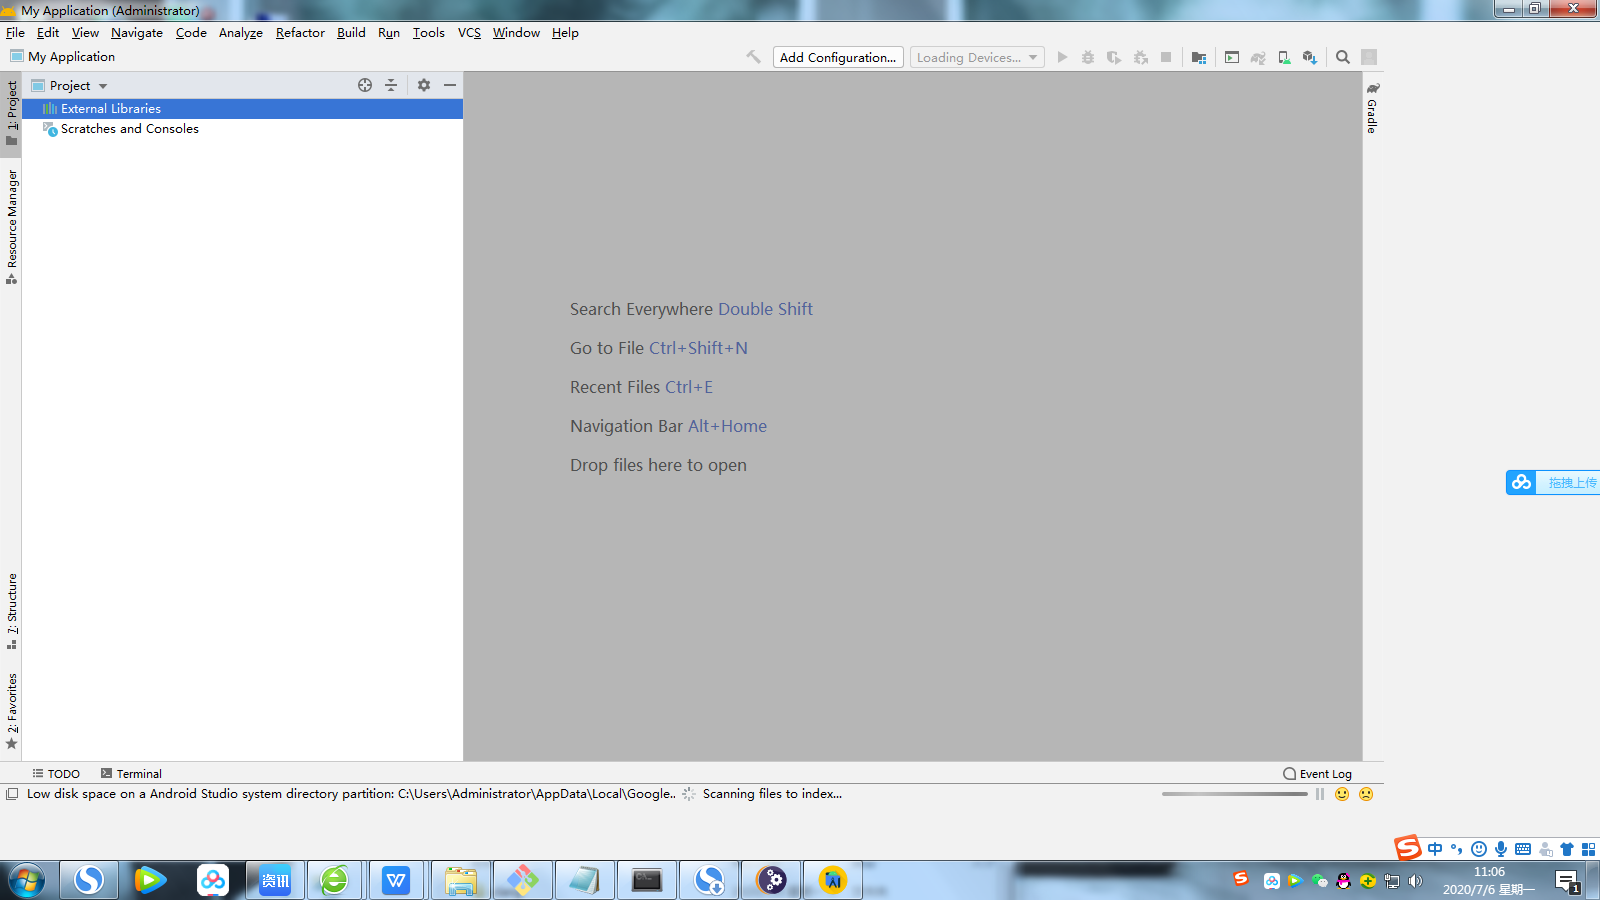
## 二、使用uiautomatorviewer 工具
（https://blog.csdn.net/test94/article/details/51519789?locationNum=3&fps=1）
1.使用adb命令连接真机或模拟器
2、打开uiautomatorviewer工具
3、使用uiautomatorviewer工具获取相关元素
4、使用Python编写猫宁考勤应用注册模板的自动化测试
补：在这里可能需要先安装一个模拟器：
同时我又配置了一遍自己的东西：




### 1.通过 adb shell dumpsys 命令获取当前应用的component

在android测试中，经常需要知道启动一个Activity所需要的component

### 2.monkeyrunner
##### monkeyrunner 模板
1、MonkeyRunner:这个类提供了用于连接monkeyrunner和设备或模拟器的方法，它还提供了用于创建用户界面显示提供了方法。 

2、MonkeyDevice:代表一个设备或模拟器。这个类为安装和卸载包、开启Activity、发送按键和触摸事件、运行测试包等提供了方法。 

3、MonkeyImage:这个类提供了捕捉屏幕的方法。这个类为截图、将位图转换成各种格式、对比两个MonkeyImage对象、将image保存到文件等提供了方法。

https://blog.csdn.net/lm_is_dc/article/details/80171750
这一篇博客是关于try expect finally的

现在卡在一个错误上，
from com.android.monkeyrunner import MonkeyRunner,MonkeyDevice,MonkeyImage

总是会报错 No module named 'com' 很无奈啊，这也是个包？这不是一个整体吗？

https://github.com/dtmilano/AndroidViewClient/wiki
这是AndroidViewClient的官网
androidviewclient完全独立，可以用python直接运行，它的包里也封装的很好，可以直接操作真机的函数。通过文本、id等都可以操作，而且暂时也不需要sleep,能够自己判断界面是否加载完成
https://blog.csdn.net/jgw2008/article/details/78264663?locationNum=7&fps=1
这一篇有介绍监视器
https://blog.csdn.net/u012195899/article/details/53837429
这篇文章介绍AndroidViewClient相关内容，入门级别，我觉得这个东西挺好的，就是时间紧张我怎么也装不上。还是按笨方法继续吧。

https://blog.csdn.net/u011014032/article/details/46275341?locationNum=15&fps=1
介绍adb和uiautomator 虽然是用Java写的，但是写的很好，可以补充一点java知识然后来看。
http://bk-zhm.lofter.com/post/1d0257b2_9a44203
这也是一篇Python -- uiautomator 使用笔记
##### uiautomator选择器
https://blog.csdn.net/jgw2008/article/details/78264663?locationNum=7&fps=1
Python-uiautomator使用说明
以下属性的选择器：
text, textContains, textMatches, textStartsWith
classNamee, classNameMatches
description, descriptionContains, descriptionMatches, descriptionStartsWith
checkable, checked, clickable, longClickable
scrollable, enabled, focusable , focused, selected
packageNamee, packageNameMatches
resourceId, resourceIdMatches
index, instance

f = d(text = '蓝牙').exists, 检查界面是否有‘蓝牙’这个文字。如果有返回True,否则False. d().exists是检查界面元素的

1. Take screenshot 截图
* take screenshot and save to local file "home.png", can not
work until Android 4.2
d.screenshot("home.png")
2. Dump Window Hierarchy
* dump the window hierarchy and save to local file "hierarchy.xml"
xml = d.dump()
3.wait for idle or window update
*wait for current window to idle
d.wait.idle()
*wait until window update event occurs
d.wait.update()

In [1]:
from uiautomator import device as d
#连接手机设备
device = MonkeyRunner.waitForConnection(1.0,'rk3288')
#这里不太好，因为万一没连接上他会一直等待，改
print(d.info)
print('hhh')
d.click(197,1179)
MonkeyRunner.sleep(5)
order_el = self.driver.find_element_by_accessibility_id("Order")
order_el.click()
sleep(1)

'''条件匹配时点击目标
d.watcher("AUTO_FC_WHEN_ANR").when(text="机器人咖啡亭").when(text="欢迎光临") \
                             .click(text="点击购买")
# d.watcher(name) ##create a new named watcher.
#   .when(condition)  ##the UiSelector condition of the watcher.
#   .click(target)  ##perform click action on the targer UiSelector.
#检查监视器是否触发 
# 一个监视器触发意味着这个监视器所有条件都匹配并且监视器运行
d.watcher("watcher_name").triggered
# true in case of the specified watcher triggered, else false
#remove the watcher
#d.watcher("watcher_name").remove()
'''


SyntaxError: invalid character in identifier (<ipython-input-1-fc05f3228b71>, line 27)

现在出现的问题是，用python写代码导致adb和uiautor
UI Automator Viewer 界面报错：
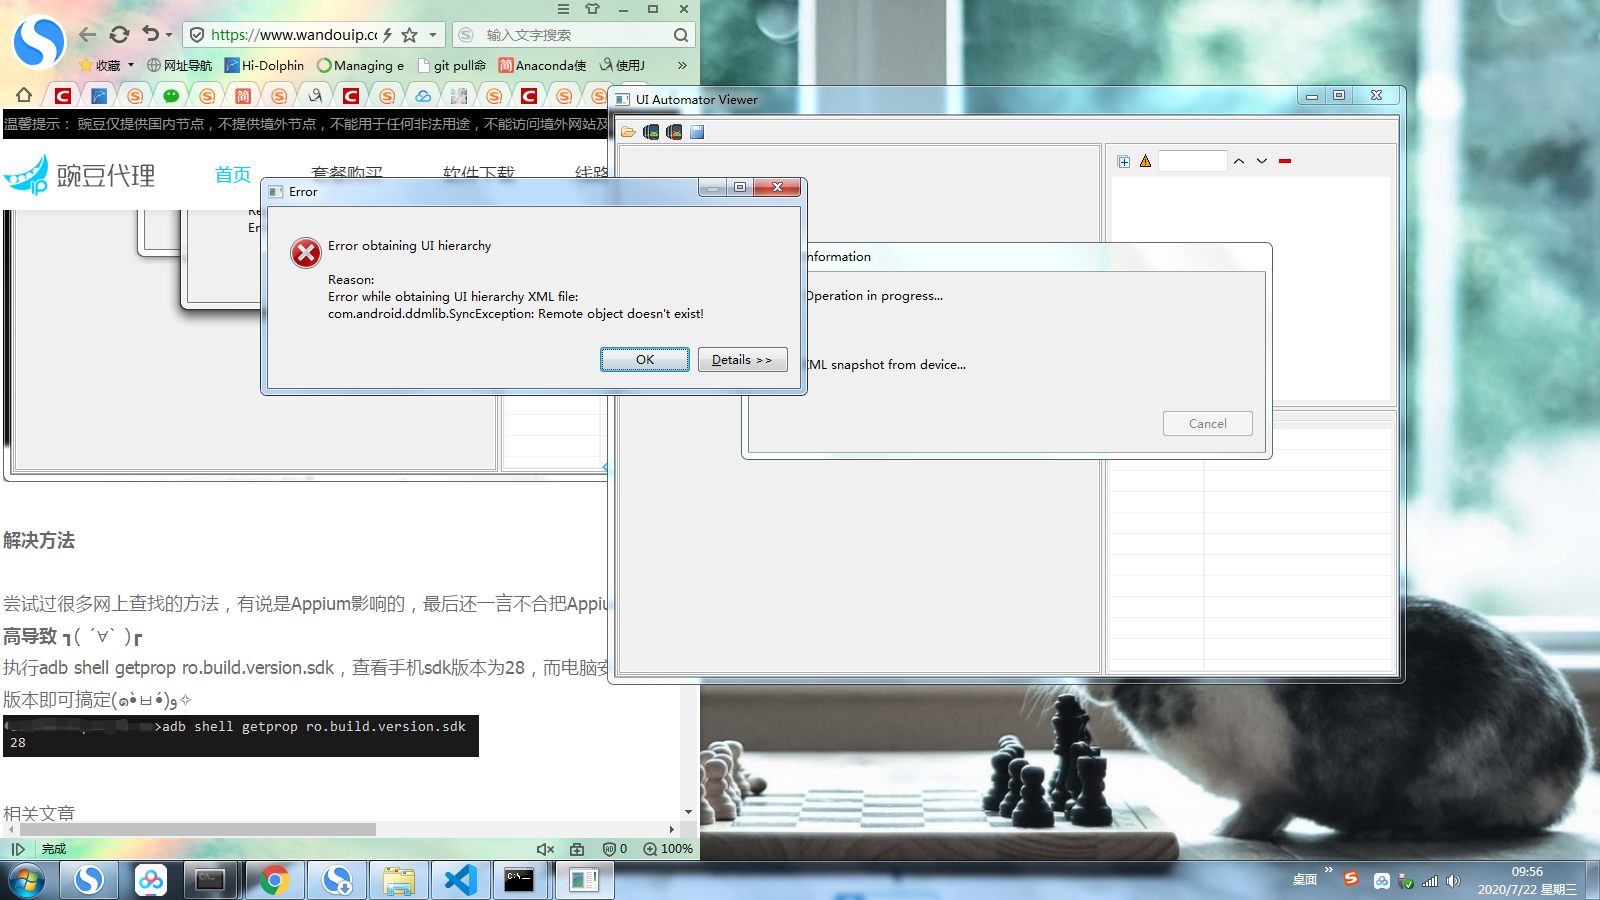
执行adb shell getprop ro.build.verdion.sdk 可以查看android机器的sdk版本,而电脑安装的platform-tools的版本是25.

结束UiAutomator进程
adb shell ps | find "uiautomator"

adb shell kill <PID>

https://github.com/xiaocong/uiautomator#handler 
 uiautomator官方文件学习：
#### Watcher

You can register watcher to perform some actions when a selector can not find a match.

//Click target when conditions match
d.watcher("AUTO_FC_WHEN_ANR").when(text="ANR").when(text="Wait").click(text="Force Close")
// .watcher(name)## creates a new named watcher.
// .when(condition)##the UiSelector conditionn of the watcher.
// .click(target)##perform click action on the target UiSelector.

//Press key when conditions match
d.watcher("AUTO_FC_WHEN_ANR").when(text="Wait").press.back.home()
//Alternative way to define it as below
d.watcher("AUTO_FC_WHEN_ANR").when(text="ARN").when(text="Wait").press("back","home")

Check if the named watcher triggered

* A watcher is triggered, which means the watcher was run and all its conditions matched.

d.watcher("watcher_name").triggered
//true in case of the specified watcher triggered, else false

d.watcher("watcher_name").remove()
//remove the watcher

d.watchers
// a list of all registered watchers' names

d.watchers.triggered
// true in case of any watcher triggered

d.watcher.reset()
//reset all triggered watcher, after that, d.watchers.triggered will be false.重置所有监视器


In [ ]:
#Handler 个人感觉还是这个更强大一些，能够自己设置回调函数
#The most different usage between handler and watcher is, handler can 
#use customized callback function.

def fc_close(device):
    if device(text = 'Force Close').exists:
        device(text='Force Close').click()
    return True 
#return True means to break the loop of handler callback functions.
#turn on the handler callback function
d.handlers.on(fc_close)

#turn off the handler callback function
d.handlers.off(fc_close)
暂停有问题


Elements显示网页的结构，Network显示浏览器和服务器的通信。我们点Network中，确保第一个小红灯亮着，Chrome就会记录所有浏览器和服务器之间的通信：
HTTP响应分为Header和Body两部分
HTTP响应分为Header和Body两部分（Body是可选项），我们在Network中看到的Header最重要的几行如下：
200 OK
200表示一个成功的响应，后面的OK是说明。失败的响应有404 Not Found: 网页不存在， 500 Internal Server Error: 服务器内部出错，等等
Content-Type: text/html 
Content-Type指示响应的内容，这里是text/html表示HTML网页。请注意，浏览器就是依靠Content-Type来判断响应的内容是网页还是图片，是视频还是音乐。浏览器并不靠URL来判断响应的内容，所以，即使URL是 http://example.com/abc.jpg ,它也不一定就是图片。

HTTP响应的Body就是HTML源码，我们在菜单栏中选择“视图”，“开发者”，“查看网站源码”就可以在浏览器中直接查看HTML源码：
当浏览器读取到新浪首页的HTML源码后，它会解析HTML，显示页面，然后，根据HTML里面的各种链接，再发送HTTP请求给服务器，拿到相应的图片、、视频、Flash、JavaScript脚本、CSS等各种资源，最终显示出一个完整的页面。

HTTP请求：
1.浏览器首先向服务器发送HTTP请求，请求包括：
    方法：GET还是POST， GET仅请求资源，POST会附带用户数据；
    路径：/full/url/path
    域名：由Host头指定：Host: www.sina.com.cn
    以及其他相关的Header
    如果是POST，那么请求还包括一个Body,包含用户数据。
 2.
   服务器向浏览器2返回HTTP响应，响应包括:
   响应代码：200表示成功，3**表示重定向，4**表示客户端发送的请求有误，5**表示服务端处理时发生了错误；
   响应类型：由Content-Type指定，例如：
   Content-Type:text/html; charset=uft-8表示响应类型是HTML文件，并且编码是UTF-8,Content-Type:image/jpeg表示响应的类型是JPEG格式的图片
   
通常服务器的HTTP响应会携带内容，也就是有一个Body,包含响应的内容，网页的HTML源码就走Body中。
3.
   如果浏览器还要继续向服务器请求其他资源，比如图片，就再次发出HTTP请求，重复步骤1、2

#### 总结成一句话，Web采用的HTTP协议采用了非常简单的请求-响应模式，从而大大简化了开发。一个HTTP请求只处理一个资源。

In [ ]:
Get /path HTTP/1.1
Header1:Value1
Header2:Value2
Header3:Value3
换行符是 \r\n HTTP响应如果包含body，也是通过\r\n\r\n来分隔的。
再次注意，Body的数据类型由Content-Type头来确定，如果是网页，
Body就是文本，如果是图片，Body就是图片的二进制数据
当存在Content-Ecoding时，Body的数据是被压缩的，最常见的压缩方法是

CSS简介
CSS是Cascading Style Sheets(层叠样式表)的简称，CSS用来控制HTML里的所有元素如何展现.
学习Web开发，首先要对HTML、CSS和JavaScript作一定的了解。HTML定义了页面的内容，CSS来控制页面元素的样式，而JavaScript负责界面的交互逻辑。
比较好的在线学习网站 w3schools:
http://www.w3schools.com/
对应的中文版：
http://www.w3schools.com.cn/
上述两个网站登不上去
https://www.quanzhanketang.com/
这个可以 先学一点，然后在看flask框架和bash
Example Explained
The DOCTYPE declaration defines the document type to be HTML
The text between <html> and </html> describes an HTML document
The text between <head> and </head> provides information about the document
The text between <body> and </body> describes the visible page content
The text between <h1> and </h1> describes a heading 
The text between <p> and </p> describes a paragraph

HTML tags are keywords (tag names) surrounded by angle brackets:
HTML标签是用尖括号扩起来的关键字
<tagname>content<>

In [ ]:
<html>
<head>
<title>Page title</title>
</head>
<body>
<h1>This is a heading</h1>
<p>This is a paragraph.</p>
<p>This is another paragraph.</p>
</body>
</html>
# only the <body> area (the white area) is displayed by 

HTML headings are defined with the <h1> to <h6> tags:
    一到六级标题
HTML links are defined with the <a> tag:
<a herf="http://www.w3school.com">This is a link</a>
HTML elements can be nested (elements can contain elements).

In [ ]:
<!DOCTYPE HTML>
<html>
<body>

<h1>My First Heading</h1>
<p>My first paragraph.</p>

</body>
</html>

<br> is an empty element without a closing tag
#### HTML Attributes HTML的属性
HTML elements can have attributes
Attributes provide additional information about an element
Attributes are always specified in the start tag
Attributes come in name/value pairs like: name="value"
##### The lang Attribute

##### The title Attribute：
HTML paragraphs are defined with the <p> tag.

##### the alt attribute：
The alt attribute specifies an alternative text to be used, when an HTML element cannot be displayed.
The value of the attribute can be read by "screen readers". This way, someone "listening" to the webpage, i.e. a blind person, can "hear" the element.##### Size Attribute:
HTML images are defined with the <img>tag

##### The href Attribute :
HTML links are defined with the <a> tag.
The filename of the source (src), and the size of the image (width and height) are all provided as attributes:
<img src="D:\picture\MyMie.jpg" alt="Mie" width="600"
height="800" title="KeeP Smiling When Facing THE wORld!">
 


Headings Are Important
Use HTML headings for headings only. Don't use headings to make text BIG or bold.

Search engines use your headings to index the structure and content of your web pages.

Users skim your pages by its headings. It is important to use headings to show the document structure.

h1 headings should be main headings, followed by h2 headings, then the less important h3, and so on.

#### HTML Horizontal Rules
<hr> tag creates a horizontal line in an HTML page.

#### The HTML <head> ELement
 The HTML <head> element has nothing to do with HTML headings.
 The HTML <head> element contains meta data.Meta data are not displayed.
 The HTML <head> element is placed between the <html> tag and the <body> tag

In [1]:
    <meta http-equiv="Content-Type" content="text/html";
    charset="UTF-8"/> 
    <!--这个可以解决中文乱码-->

SyntaxError: invalid syntax (<ipython-input-1-dcb790618044>, line 1)

The HTML <br> element defines a line break.
Use <br> if you want a line break (a new line) without starting a new paragraph.


### 接上 python 的 web开发

In [ ]:
def application(enveron, start_response):
    start_response('200 OK',[('Content-Type','text/html')])
    return [b'<h1>HELLO,WEB!</h1>']

In [ ]:
application()函数就是符合WSGI标准的一个HTTP处理函数，它接收两个参数：
environ : 一个包含所有HTTP请求信息的dict对象；
start_response:一个发送HTTP响应的函数。
在application()中，调用
start_response('200 OK',[('Content-Type','text/html')])
就发送了HTTP响应的Header,注意Header只能发送一次，
也就是只能调用一次start_response()函数
start_response()函数接收两个参数，一个是HTTP响应码，一个是一组list表示的
HTTP Header, 每个Header用一个包含两个str 的 tuple表示
通常情况下，都应该把Content-Type头发送给浏览器。其他很多常用的HTTP Header
也应该发送。
然后，函数的返回值b'<h1>Hello,web!</h1>将作为HTTP响应的Body发送给浏览器
现在使用内置WSGI服务器，模块叫做wsgiref, 它是用纯Python编写的WSGI服务器的
参考实现。但是不考虑任何运行效率，仅供开发和测试使用。

WSGI（The Web Server Gateway Interface）是服务器程序与应用程序的一个约定，它规定了双方各自需要实现什么接口，
提供什么功能，以便两者能够配合使用


1.以下是一些将python嵌入html文件中的快速开发的文件
https://blog.csdn.net/sinat_38682860/article/details/103310809
https://blog.csdn.net/alreadyRAY/article/details/95063961
https://blog.csdn.net/yzy_1996/article/details/80223053
HTML网页调用本地Python程序
https://www.cnblogs.com/seven7777/p/12101188.html
    web user服务器
https://docs.python.org/2/howto/webservers.html

JavaScript代码可以直接嵌在网页的任何地方，不过通常我们都把JavaScript代码放到<head>中。

ctrl+shift+I 开发者工具 在（Console)控制台中可以输入JavaScript代码，按回车执行

JavaScript的语法和Java类似，每个语句以;结束 ，语句块用{...}。
 赋值语句： var x=1;
 语句块：
 if(2>1){
     x=1;
     y=2;
     z=3;
 }
单行注释用//
多行注释用/*...*/

###注意，javaScript严格区分大小写，如果弄错了大小写，程序将报错或者运行不正常

#### 数据类型
#### Number
123;//整数
0.456;//浮点数0.456
1.2345e3;//科学计数法表示 1.2345×1000
-99;//负数
NaN;//NaN表示Not a Number, 当无法计算时用NaN表示
Infinity;//Infinity表示无限大，当数值超过了JavaScript所能表示的最大值时，就表示为Infinity
10%3;//1 这是求余
10.5%3//1.5
字符串 ""  '' 
布朗值
### && 与   || 或  ！非
要特别注意相等运算符==。JavaScript在设计时，有两种比较运算符：

第一种是==比较，它会自动转换数据类型再比较，很多时候，会得到非常诡异的结果；

第二种是===比较，它不会自动转换数据类型，如果数据类型不一致，返回false，如果一致，再比较。

由于JavaScript这个设计缺陷，不要使用==比较，始终坚持使用===比较。

NaN这个特殊的Number与所有其他值都不相等，包括他自己：
NaN === NaN //false
唯一能判断NaN 的方法是通过isNaN()函数：
isNaN(NaN);
#### 两个浮点数比较大小，只能计算绝对值之差
Math.abs(1/3 - (1 - 2/3)) < 0.00001; //true

JavaScript的设计者希望用null表示一个空的值，而undefined表示值未定义。事实证明，这并没有什么卵用，区分两者的意义不大。大多数情况下，我们都应该用null。undefined仅仅在判断函数参数是否传递的情况下有用。

#### 创建数组
直接用 
[1, 2, 3.14,'Hello', null, true]

#### 打印变量
使用console.log()代替alter()的好处是可以避免弹出对话框

#### 对象：由键-值组成的无序集合
要获取一个对象的属性，我们用 对象变量.属性名的方式

#### 变量一定都要用 var声明！！！ 全部使用'use strict'模式

#### Flask使用Jinja 2模板引擎来分离数据逻辑和展示层

#### 两种最常用的HTTP方法：Get 和 Post
在客户机和服务器之间请求-响应时
GET -从指定的资源请求数据
POST -向指定的资源提交要被处理的数据

@app是写在python代码中的

In [ ]:
import os

from flask import Flask

def create_app(test_config=None):
    #create and configure the app
    app = Flask(__name__, instance_relative_config=True)
    #创建Flask实例。
    '''__name__是当前Python模块的名称。应用需要知道哪里设置路径，
    使用__name__是一个方便的方法'''
    '''
    instance_relative_config=True告诉应用配置文件是相对insance folder
    的相对路径。实例文件夹在flaskr包的外面，用于存放本地数据
    '''
    app.config.from_mapping(
        SECRET_KEY='dev',
        DATABASE=os.path.join(app.instance_path,'flaskr.sqlite'),
    )
    '''
    app.config.from_mapping()设置一个应用的缺省配置：
    SECRET_KEY 是被Flask和扩展用于保证数据安全的。开发时，方便可设置为‘dev’
    DATABASE SQLite数据库文件存放用于保证数据安全
    '''
    if test_config is None:
        # load the instance config, if it exits, when not testing
        app.config.from_pyfile('config.py',silent=True)
    else:
        #load the test config if passed in
        app.config.from_mapping(test_config)

    #ensure the instance folder exists
    try:
        os.makedirs(app.instance_path)
    except OSError:
        pass
    
    # a simple page that says hello
    @app.route('/hello')
    def hello():
        return 'Hello,World!'
    '''
    创建一个简单的路由。他创建了URL/hello和一个函数之间的关联。这个函数会返回一个响应，
    即'Hello,World!'
    '''
    return app
    
    create_app()

http://c.biancheng.net/view/7588.html
还是别逞强了，老老实实写一个代码吧

每个HTML元素周围都有一个方框，即使您看不到它也是如此。
CSS border属性定义HTML元素周围的可见边框。
The CSS border property defines a visible border around an HTML element.

git add *
git commit -m "写上注释"
git push 

#### HTML
margin是指元素自身边框到另一个元素边框之间的距离
padding是指元素自身边框到自身内部另一个元素之间的距离
float:left
clear:both

In [ ]:
adb -s5OUB01NX80 shell wm size

In [ ]:
在正则表达式中，如果直接给出字符，就是精确匹配。
用\d可以匹配数字，\w可以匹配一个字母或数字
.可以匹配任意字符

要匹配变长的字符，在正则表达式中，用*表示任意个字符，
用+表示至少一个字符，用？表示0个或1个字符，用{n}表示n个字符，
用{n,m}表示n-m个字符


# 编写Android程序

1.两个基本概念：
它们如何提供多个接入口
它们如何适应不同的设备
 应用提供多个入口点：
 Android 应用由各种可单独调用的组件构成。例如，Activity是提供界面（UI）的一种应用组件。
 “主”Activity在用户点按应用图标时启动。您还可以将用户从其他位置（例如，从通知中，甚至从其他应用中）引导至某个Activity
 
 其他组件（如广播接收器和服务）使应用能够在没有界面的情况下执行后台任务。
 
应用可适应不同的设备
Android 允许为不同的设备提供不同的资源。例如，可以针对不同的屏幕尺寸创建不同的布局。系统会根据当前设备的屏幕尺寸确定要使用的布局。


任务管理器可以查看正在运行的程序：
ctrl+Alt+Delete 出现任务管理器 这里面就能看到所以正在运行的程序和后台运行的程序

No Android SDK found. Before continuing, you must download the necessary components or select an existing SDK. 
这个解决方法： Windows 程序管理器 资源监视器，查一下把进程都停了，之后再重新启动Android Studio就可以了。
想把他改成

### Google 中国开发者网站 
https://developers.google.cn/

https://developer.android.google.cn/index.html Android官网教程

Android 应用的界面以布局和微件的层次结构形式构建而成。布局是 ViewGroup 对象， 即控制其子视图在屏幕上的放置方式的容器。 微件是View 对象，即按键和文本框等界面组件。
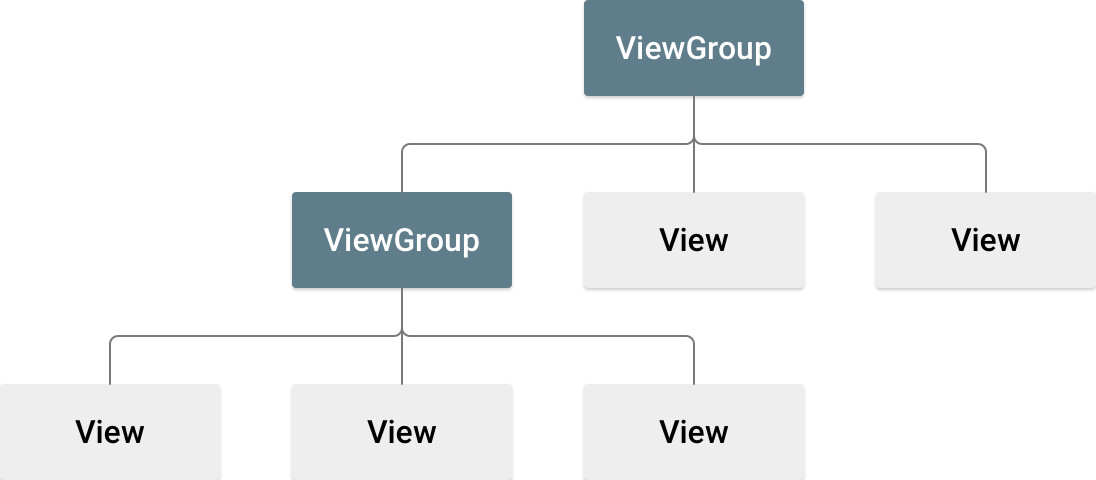

In [ ]:
# adb 的一些指令
adb install [r][-s]***.apk #安装软件
adb unstall [-k]<包名> #卸载app
adb pull      #取出手机中的文件
adb push      #发送文件到手机中
adb shell     #进入手机终端
adb devices   #列出所有连接的设备
areset adb:   #重启
netstat -ano  #查看端口号占用的进程


## 项目概览

Android Studio 中的项目包含为应用定义工作区的所有内容，包括源代码和资产以及测试代码和构建配置。当开启一个新项目时， Android Studio会为您的所有文件创建所需的结构，并使其在IDE左侧的Project窗口可见（依次点击 View > Tool Windows > Project）

### 模块
模块是源文件和构建设置的集合，可让你将项目划分为独立的功能单元。您的项目可以包含一个或多个模块，一个模块可以将另一个模块作为依赖项。每个模块都可以单独构建、测试和调试。

在以下情况下添加更多模块会非常有用：在自己的项目中创建代码库时，希望为不同设备类型（例如手机和穿戴设备）创建不同的代码和资源集，但将所有文件都限定在同一个项目中并共享一些代码时。

### 项目文件

项目文件视图是按模块和文件类型进行整理，以简化项目的关键源文件之间的导航方式，并隐藏某些不常用的文件或目录。
1.在顶级Gradle Script组中显示相应项目的所有与构件有关的文件
2.在模块级组中显示每个模块的所有清单文件
3.在一个组中显示所有备用资源文件。

#### manifests
包含 AndroidManifest.xml文件

#### java
包含Java源代码文件，这些文件按软件包名称分隔

#### res
包含所有非代码资源（例如XML布局、界面字符串和相位图像），这些资源划分为相应的子目录。


### Android 项目视图

要查看项目的实际文件结构（包括在Android视图中隐藏的文件），请从Project窗口顶部的下拉列表1中选择Project


In [ ]:
module-name/
    build/
        包含构建输出
    libs/
        包含专用库
    scr/
        包含相应模块的所有代码和资源文件，分为以下子目录：
        androidTest/
            包含在Android设备上运行的插桩测试代码。
        main/
            包含“主”源代码集文件：所有构建变体共享的Android代码和资源（其他构建变体的文件位于同级目录中，例如调试构建类型的文件位于src/debug/中）
            AndrroidManifest.xml
                描述应用及其各个组件的性质。
            java/
                包含Java代码源
            jni/
                包含使用Java原生接口（JNI）的原声代码。
            gen/
                包含Android Studio生成的Java文件
            res/
                包含应按原样构造为.apk文件的文件。可以使用URI按照与典型文件系统
                相同的方式导航此目录，并使用AssetManager以字节流的形式读取文件。
            test/
                包含在主机JVM上运行的本地测试代码
        build.grandle(模块)
            这定义了特定于模块的构建配置。
    build.grandle(项目)
        这定义了适用于所有模块的构建配置。该文件是项目不可或缺的一部分，因此应该将其1与所有其他源代码一起保留在修订版本控制系统中。

#### 项目结构设置：
要更改 Android Studio 项目的各种设置，请依次点击 File > Project Structure 打开 Project Structure 对话框。该对话框包含以下各部分：

SDK Location：设置项目使用的 JDK、Android SDK 和 Android NDK 的位置。
Project：设置 Gradle 和 Android plugin for Gradle 的版本以及代码库位置名称。
Developer Services：包含来自 Google 或其他第三方的 Android Studio 附加组件的设置。请参阅下文的开发者服务。
Modules：可让您修改特定于模块的构建配置，包括目标和最低 SDK、应用签名以及库依赖项。请参阅下文的模块。


You cannot apply both the com.android.application and the java plugin inthe same module. 